In [17]:
import numpy as np
from scipy import linalg as sp_la
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$
$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

In [18]:
HTML("<style>"\
    "div.cell{"\
        "width:50%;"\
        "margin-left:25%;"\
        "margin-right:auto;"\
    "}"\
"</style>")

# Parameter distribution

From <a href='#GaussianIidLikelihood'>Likelihood</a> given by
$$
p(\tb \mid \wb, \beta) =
\left(
  \dfrac{\beta}{2\pi}
\right)^{N/2}
\EXP{
  -\dfrac{\beta}{2}
  \sumnN \left( t_n - \wt \phi\left(\xb_n\right) \right)^2
}
= \Nl{\tb}{\Phibt \wb}{\beta \I}
$$

Since the likelihood is exponential of quadratic function of **w**, the prior is a Gaussian given by
$$ p(\wb) = \Nl{\wb}{\mb_0}{\Sb_0} $$
Now we need to find $p(\wb \mid \tb)$

Given a marginal Gaussian for **x** and a conditional gaussian for **y** given **x** of the form

\begin{array}{rl}
p(\xb) &= \Nl{\xb}{\mub}{\li}\\
p(\yb \mid \xb) &= \Nl{\yb}{\Ab\xb + \bb}{\Lbi}
\\
\color{green}{\text{Conditional }}
p(\xb \mid \yb)
&=
\Nl
{\xb}
{\Sigma \left\{ \At\Lb(\yb-\bb) + \Lambda\mub \right\}}
{\Sigma}
\\
\text{where }
\Sigma &= \left(\Lambda + \At\Lb\Ab\right)^{-1}
\end{array}

Here
$$
\arrthree{
\xb \equiv \wb & 
\mub \equiv \mb_0 &
\li \equiv \Sb_0 \\
\yb \equiv \tb &
\Ab \equiv \Phib & 
\Lb \equiv \beta \I
}
$$

Thus the posterior is given by
$$
\arrthree{
p(\wb \mid \tb)
&=
\Nl{\wb}{\mb_N}{\Sb_N}
\\
\text{where }
\mb_N
&=
\Sigma \left\{ \At\Lb(\yb-\bb) + \Lambda\mub \right\}
=
\Sb_N \left\{ \Phibt \beta \tb + \Sb_0^{-1} \mb_0\right\}
=
\Sb_N \left( \beta \Phibt \tb + \Sb_0^{-1} \mb_0\right)
\\
\Sb_N^{-1}
&=
\left(\Lambda + \At\Lb\Ab\right)
=
\left(\Sb_0^{-1} + \Phibt \beta \Phib \right)
=
\left(\Sb_0^{-1} + \beta \Phibt \Phib \right)
}
$$

* Since posterior is Gaussian, mode = mean, which implies $\ml{\wb} = \mb_N$
* For an infinitely broad prior, $\Sb_0 = \inv{\alpha} \I$ with $\alpha \rightarrow 0$, the mean $\mb_N \rightarrow \ml{\wb}$
* Similarly, for N=0, mean reverts to the prior

## Restriction

From now on, lets consider the prior as an isotropic Gaussian with precision $\alpha$, such that
<div id='BayesianLinearRegressionPosteriorParameters'/>
$$
\arrthree{
p(\wb \mid \alpha)
&=
\Nl{\wb}{\mathbf{0}}{\alpha^{-1}\I}
}
$$

Thus the posterior parameters becomes

$$
\arrthree{
\mb_N
&=
\Sb_N (\beta \Phib^T \tb)
=
\beta \Sb_N \Phib^T \tb
\\
\Sb_N^{-1} 
&=
\alpha\I + \beta \Phib^T \Phib
}
$$

the thing to note here is $\inv{\Sb_N}$ depends on $\Phib$,  
which means that the precision/covar depends on $\xb$

The log of the posterior given by the sum of the log likelihood and log prior, as
$$
\ln ~p(\wb \mid \tb)
=
-\dfrac{\beta}{2}
\sumnN \sqrbrc{ t_n - \wt \phi(\xb_n)}
-\dfrac{\alpha}{2} \wt \wb
+ \text{ const}
$$
The max of this posterior wrt **w** is equivalent to 
minimization of the sum-of-the-squares error function
with the addition of the quadratic regularization term,
with $\lambda = \alpha / \beta$

## Experiments

In [19]:
def fun_f(x, a):
    return a[0] + a[1]*1*x

In [20]:
# forms a meshgrid and computes the value of the gaussian at each gridpoint
def show_gaussian(mean, precision_mat):
    in_pts = 100
    x = np.linspace(-1,1,in_pts)
    xv,yv=np.meshgrid(x,x)
    #coefficient = sqrt(\beta)/(2 \pi)
    coeff =math.sqrt(np.linalg.det(precision_mat)/(2.*math.pi))
    img = np.zeros((in_pts,in_pts))
    for ix in range(in_pts):
        for iy in range(in_pts):
            x = np.array([xv[ix,iy],yv[ix,iy]]).reshape(-1,1)
            # -1/2 * (x-mu)T Precision (x-mu)
            expt = -1./2. * (x - mean).T @ precision_mat @ (x-mean)
            img[ix,iy] = coeff * math.exp(expt[0,0])
    ticks = np.arange(-1,1,1.0)
    extent = (-1,1,-1,1)
    plt.imshow(img, extent=extent, origin='lower')
    return img

In [21]:
# forms a meshgrid and computes the value of the gaussian at each gridpoint
# using broadcasting
def show_gaussian2(mean, precision_mat):
    in_pts = 100
    x = np.linspace(-1,1,in_pts)
    xv,yv=np.meshgrid(x,x)
    #coefficient = sqrt(\beta)/(2 \pi)
    coeff =math.sqrt(np.linalg.det(precision_mat)/(2.*math.pi))
    xv = xv.ravel().reshape(-1,1) # make em column vectors
    yv = yv.ravel().reshape(-1,1)
    # X = [xv yv] -> [N x 2]
    X = np.hstack([xv,yv])
    mean_vector = mean.reshape(1,-1) # make it col vector
    X_m_u = (X - mean_vector) # [broadcast] find the diff of each pt with mean
    # [broadcast] coeff * math.e**(-1/2 * (x-mu)T Precision (x-mu))
    img2 = coeff * math.e**(-1./2. * np.sum(X_m_u @ precision_mat * X_m_u, 1))
    # reshape it back to an image
    img2 = img2.reshape(in_pts,in_pts)
    ticks = np.arange(-1,1,1.0)
    extent = (-1,1,-1,1)
    plt.imshow(img2, extent=extent, origin='lower')
    return img2

In [22]:
# compute the posterior as given in text
def compute_posterior(in_samples,a0,a1,beta_sd,alpha):
    beta = 1./beta_sd**2
    mean_0 = np.array([0,0]).reshape(-1,1)
    xn = (np.random.rand(in_samples)*2.0 - 1.0).reshape(-1,1)
    fn = fun_f(xn, [a0,a1]).reshape(-1,1)
    data = np.hstack([xn, fn])
    xn_noise = np.random.normal(0,beta_sd,in_samples).reshape(-1,1)
    # tn = a0 + a1*x + N(0,1/beta)
    tn = np.array(fn + xn_noise).reshape(-1,1)
    # phi = [ones^T x^T]
    phi = np.hstack([np.ones_like(xn),xn])
    # Sn = beta*phi^T*phi + alpha*I
    sn_inv = beta * phi.T @ phi + alpha*np.eye(2)
    sn = np.linalg.inv(sn_inv)
    # m_n = beta*Sn*Phi^T*Tn
    mean_n = beta * sn @ phi.T @ tn
    return (data, mean_n, sn, sn_inv)

In [23]:
def show_bay_lin_reg(in_samples,a0,a1,beta_sd,alpha):
    data, mean_n, sn, sn_inv = compute_posterior(in_samples,a0,a1,beta_sd,alpha)
    plt.plot(a0,a1,'ok', markersize=6, label='gt')
    plt.plot(a0,a1,'or', markersize=3, label='gt')
    plt.plot(a0,a1,'+w', markersize=30, label='gt')
    show_gaussian2(mean_n, sn_inv)
    plt.legend(loc=(1,0.5))
    plt.show()
    #plt.plot(data[:,0], data[:,1], 'o')
    #plt.xlim([-1,1]); plt.ylim([-1,1])
    #plt.show()
    return (mean_n, sn_inv)

In [24]:
import timeit
# mean_n, sn, sn_inv = compute_posterior(40,-0.3,0.5,0.2,2.0)
#timeit.timeit('show_gaussian(mean_n, sn_inv)','from __main__ import mean_n, sn_inv, show_gaussian')
#timeit.timeit('show_gaussian2(mean_n, sn_inv)','from __main__ import mean_n, sn_inv, show_gaussian2')


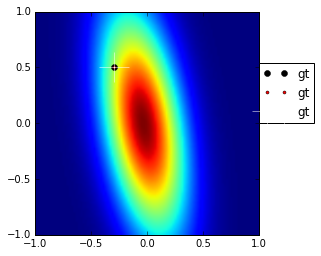

<function __main__.interact_bay_lin_reg>

In [25]:
def interact_bay_lin_reg(in_samples=1,
                         a0=-0.3,a1=0.5,
                         beta_sd=0.25,alpha=2.0,
                         show_all=True):
    show_bay_lin_reg(in_samples,a0,a1,beta_sd,alpha)
    
interact(interact_bay_lin_reg,
         in_samples=(0,40),
         a0=(-1,1,0.1),a1=(-1,1,0.1),
         beta_sd=(0,1,0.05),alpha=(1,5,1))

# Predictive Distribution

* Usually not interested in the value of **w** itself.
* need to make prediction of *t* for new values of **x**
* Predictive Distribution $
p(t \mid \tb, \alpha, \beta)
=
\int p(t \mid \wb, \beta) p(\wb \mid \tb, \alpha, \beta) ~d\wb
$
* The conditional distribution is given by
$$
p(t \mid \wb, \beta) = \Nl{t}{y(\xb,\wb)}{\beta^{-1}}
$$
* Posterior is given by
$$
\arrthree{
p(\wb \mid \tb)
&=
\Nl{\wb}{\mb_N}{\Sb_N}
\\
\text{where }
\\
\mb_N &= \Sb_N \left( \Sb_0^{-1} \mb_0 + \beta \Phib^T \Phib \right)
\\
\Sb_{N}^{-1} &= \Sb_{0}^{-1} + \beta \Phib^T \Phib
}
$$

Using <a href='../Gaussian Stuff.ipynb#BayesTheoremForGaussianVariables'>Bayes' Theorem for Gaussian Variables</a>, we have the following

Given a marginal Gaussian for **x** and a conditional gaussian for **y** given **x** of the form

$$
\arrthree{
p(\xb) 
&=
\Nl{\xb}{\mub}{\li}
\\
p(\yb \mid \xb)
&=
\Nl{\yb}{\Ab\xb + \bb}{\Lbi}
\\
\color{green}{\text{Marginal }}
p(\yb)
&=
\Nl{\yb}{\Ab\mub+\bb}{\Lbi + \Ab\Lambda^{-1}\At}
\\
}
$$

Here
$$
\arrthree{
\xb &\equiv \wb
&
\mub &\equiv \mb_N
&
\li &\equiv \Sb_N
\\
\yb &\equiv t
&
\At,\bb &\equiv \Phib,\mathbf{0}
&
\Lbi &\equiv \beta^{-1}
}
$$

Hence
$$
\arrthree{
\E{\yb}
&=
\Ab \mub + \bb = 
\mb_N^T \Phib
\\
\sigma(\yb)
&=
\beta^{-1} + \Phib^T \Sb_N \Phib
}
$$

The second term goes to zero as N increases ([Qazaz][qazaz1997]).

[qazaz1997]: http://dl.acm.org/citation.cfm?id=268081 "Cambridge University Press. Qazaz, C. S., C. K. I. Williams, and C. M. Bishop (1997). An upper bound on the Bayesian error bars for generalized linear regression. In S. W. Ellacott, J. C. Mason, and I. J. Anderson (Eds.), Mathematics of Neural Networks: Models, Algorithms and Applications, pp. 295–299. Kluwer."


If we treat both $\wb, \beta$ as unknown, the predictive distribution becomes a Student't t-distribution (<a href='/notebooks/void-main/Gaussian%20Stuff.ipynb#Unknown-mean,-unknown-variance'>Unknown Mean,Variance</a>)

## Experiments

In [41]:
# basis functions
def gimme_phis(x, degree):
    x_out = np.ones((x.shape[0], degree+1))
    for degree in range(1, degree+1):
        x_out[:,degree:degree+1] = x**degree
    return x_out

In [44]:
def get_data(in_samples):
    # sample random theta from [0,2*pi]
    in_pts_pred = 10**2
    thetas = (np.random.rand(in_samples)*2*math.pi).reshape(-1,1)
    thetas_plt = np.linspace(0, 2*math.pi, in_pts_pred).reshape(-1,1)
    return (thetas, thetas_plt)
def plot_sine(thetas):
    plt.plot(thetas, [math.sin(theta) for theta in thetas],label='sine', linewidth=4, color='g')

In [78]:
?np.random.normal

In [46]:
# gen from sine and add gaussian noise
def generate_tn(in_samples, thetas, beta_sd = 0.2):
    beta = 1./(beta_sd**2)
    xn_noise = np.random.normal(0, beta_sd, in_samples).reshape(-1,1)
    tn = [math.sin(theta[0]) for theta in thetas]
    tn = np.array(tn).reshape(-1,1)
    tn = tn + xn_noise
    return tn

$$
\arrthree{
\Sb_N^{-1} 
&=
\alpha\I + \beta \Phib^T \Phib
\\
\mb_N
&=
\Sb_N (\beta \Phib^T \tb)
=
\beta \Sb_N \Phib^T \tb
}
$$

In [43]:
def compute_parameters(thetas, degree, tn, beta, alpha):
    phi_posterior = gimme_phis(thetas, degree)
    # Sn = beta*phi^T*phi + alpha*I
    sn_inv = beta * phi_posterior.T @ phi_posterior + alpha*np.eye(degree+1)
    sn = np.linalg.inv(sn_inv)
    # m_n = beta*Sn*Phi^T*Tn
    mean_n = beta * sn @ phi_posterior.T @ tn
    return (mean_n, sn)

$$
\arrthree{
\E{\yb}
&=
\mb_N^T ~\Phi(\xb)
\\ &=
\Phib \mb_N
\\
\sigma^2
&=
\beta^{-1} + \Phi^T(\xb) ~\Sb_N ~\Phi(\xb)
\\ &=
\beta^{-1} + \Phib \Sb_N \Phib^T
}
$$

In [74]:
def predict(thetas, degree, beta, mean_n, sn):
    phi_pred = gimme_phis(thetas, degree)
    mean_pred = phi_pred @ mean_n
    print(phi_pred.shape, sn.shape)
    covar_pred = 1./beta + np.sum(phi_pred @ sn @ phi_pred.T, 1).reshape(-1,1)
    print(covar_pred.shape)
    return (mean_pred, covar_pred)

In [48]:
def plot_covar_pred(thetas, mean, covar):
    for xy in np.hstack([thetas, mean, covar]):
        x, y1, y2 = xy[0], xy[1]-xy[2], xy[1]+xy[2]
        plt.plot((x,x),(y1,y2),'-', color=(.969, .812, .812), linewidth=3)

(100, 5) (5, 5)
(100, 1)


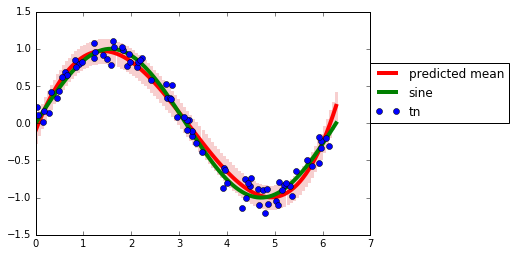

In [84]:
#degree, in_samples, beta_sd, alpha = 3, 10, 0.2, 2.0

def interact_bayesian_prediction(degree=4, in_samples=80, beta_sd=0.2, alpha=2.0):
    beta = 1./(beta_sd**2)
    thetas, thetas_plt = get_data(in_samples)
    tn = generate_tn(in_samples, thetas, beta_sd)

    mean_n, sn = compute_parameters(thetas, degree, tn, beta, alpha)
    mean_pred, covar_pred = predict(thetas_plt, degree, beta, mean_n, sn)
    sd_pred = np.sqrt(covar_pred)
    #print(sd_pred.T)

    plot_covar_pred(thetas_plt, mean_pred, sd_pred)
    plt.plot(thetas_plt, mean_pred, color='r', linewidth=4, label='predicted mean')
    plot_sine(thetas_plt)
    plt.plot(thetas, tn, 'ob',label='tn')
    plt.legend(loc=(1,0.5))
    plt.show()
interact(interact_bayesian_prediction, degree=(0,10), in_samples=(1,100,10),
         beta_sd=(0.1, 2.0, 0.1), alpha=(1.0, 5.0, 0.5) )

The beauty is that the uncertainty is low in the areas where we have seen data and more when we haven't.  
Why does that happen?

$$
\sigma^2 = \beta^{-1} + \Phi^T(\xb) ~\Sb_N ~\Phi(\xb)
$$

As a consequence it can be shown (Qazaz et al., 1997) that $\sigma^2_N(\xb) \ll \sigma^2_{N+1}(\xb)$. 
In the limit $N \rightarrow \infty$, the second term in above equation goes to zero, and the variance of the predictive distribution arises solely from the additive noise governed by the parameter $\beta$.


not w/o a problem though  
In regions away from basis function centers, contribution from 2dn term of sigma becomes zero.  
Hence, model becomes very confident in its predictions when extrapolating outside the region occupied by basis functions  

This can be avoided by using GP

# Equivalent Kernel

* The posterior mean (<a href='#BayesianLinearRegressionPosteriorParameters'>Posterior Mean</a>) is given by $\mb_N = \beta \Sb_N \Phib^T \tb$.
* Sub this into the regression function, we have
$$
\arrthree{
y(\xb, \mb_N)
&=
\mb_N^T \phi(x)
\\
&=
\phi(x) \mb_N^T
\\
&=
\beta \phi(\xb)^T \Sb_N \Phib^T \tb
\\
&=
\beta \phi(\xb)^T \Sb_N
\mat{
\vdots      & \cdots & \vdots \\
\phi(\xb_1) & \cdots & \phi(\xb_N) \\
\vdots      & \cdots & \vdots \\
}
\tb
\\
&=
\sumnN \beta \phi(\xb)^T \Sb_N \phi(\xb_n) t_n
\\
&=
\sumnN k(\xb,\xb_n) t_n
\\
\text{where }\\
k(\xb,\xb^{\prime})
&=
\beta \phi(\xb)^T \Sb_N \phi(\xb_n)
}
$$

* *k* is called *smoother matrix* or the *equivalent kernel*
* *Linear Smoothers*: Makes predictions by taking linear combination of the training set target values
* 

$$
\arrthree{
\sigma[y(\xb),y(\xb^{\prime})]
&=
\sigma[\phi(\xb)^T\wb, \wb^T \phi(\xb^{\prime})]
\\
&=
\phi(\xb)^T \Sb_N \phi(\xb^{\prime})
\\
&=
\beta^{-1} k(\xb, \xb^{\prime})
}
$$
[? How the fuck did you get to that second step]